# Fraud Email Detection
This project discusses the use of Fraud email detection.

In [50]:
import re
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

## Preprocessing Data
This section discusses the preprocessing of the email text, removing the headers and the unnecessary characters.

### Import re
https://www.w3schools.com/python/python_regex.asp
### x.strip()
https://www.w3schools.com/python/ref_string_strip.asp

In [18]:
def cl_em_text(email_text):
    """
    Cleans the email data text by removing the unnecessary and the headers from the data text
    """
    email_text = re.sub(r'http\S+', '', email_text) #Removing URLs
    email_text = re.sub(r'\b\d+\b', '', email_text) #Removing numbers
    email_text = re.sub(r'[^\w\s]', '', email_text) #Remove punctuations
    email_text = email_text.lower() #Converts to lower
    return email_text.strip()

## Feature Extraction
Now, we would extract features for further processing
### sklearn
https://scikit-learn.org/stable/index.html
### vetorizer

### CountVectorizer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [24]:
def extract_features(email_texts):
    """
    Converts emails into numerical features
    """
    vectorizer = CountVectorizer(stop_words = 'english', max_features = 1000)
    features = vectorizer.fit_transform(email_texts)
    return features, vectorizer

## Model training
This step would train the model for further classification of spam/not spam emails
### Train_Test_Split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
### MultinomialNB()
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
### Accuracy_Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
### Joblib.dump
https://www.geeksforgeeks.org/massively-speed-up-processing-using-joblib-in-python/

In [33]:
def tr_model(features, labels):
    """
    Training the machine learning model for email scam detection
    """
    X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)
    model = MultinomialNB()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(f"Model Accuracy: {accuracy_score(Y_test, predictions)}")
    joblib.dump(model, "scam_detector_model.pkl")
    return model

## Email Scanning
After model training, the model would scan emails and load the email scanner model.

In [34]:
def scan_email(email_text, vectorizer, model):
    """
    Scans email and predicts whether its scam or not
    """
    clean_text = cl_em_text(email_text)
    features = vectorizer.transform([clean_text])
    prediction = model.predict(features)
    return "Scam" if prediction[0] == 1 else "Not Scam"

## Loading datasets/utils
Now, after creating a model, we would add the datasets using pandas

### pandas
https://www.w3schools.com/python/pandas/default.asp
### read_csv
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [35]:
def load_datasets(file_path):
    """
    Loads dataset from CSV file
    """
    data = pd.read_csv(file_path)
    return data['email_text'], data['labels'] # Columns are assumed to be email_text, label

## Defining main
This is the final function, where all the previous models are called and the detection is processed.

In [57]:
def plot_results(predictions):
    # Convert predictions from 'Scam' and 'Not Scam' to 1 and 0
    predictions = [1 if pred.lower() == 'scam' else 0 for pred in predictions]
    
    # Create scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(predictions)), predictions, color=['red' if pred == 1 else 'green' for pred in predictions], s=100)

    # Add labels and title
    plt.title("Email Spam Classification Results")
    plt.xlabel("Email Index")
    plt.ylabel("Spam (1) / Not Spam (0)")
    plt.yticks([0, 1], ['Not Spam', 'Spam'])

    plt.tight_layout()
    plt.show()

Model Accuracy: 1.0


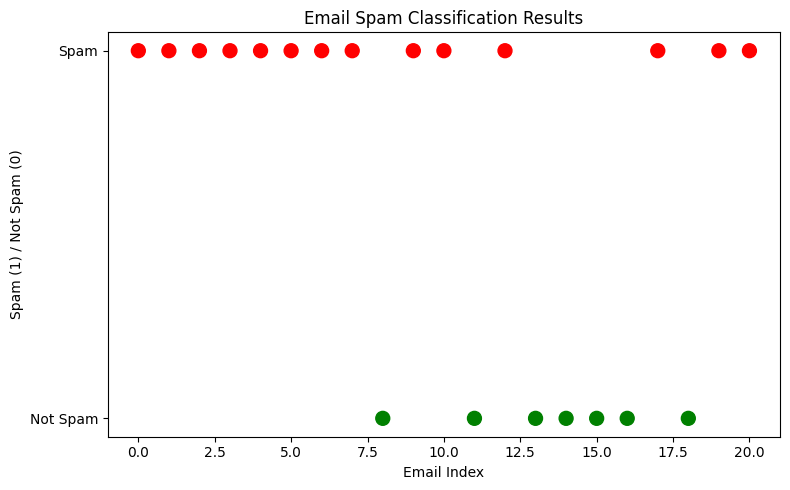

In [58]:
def main():
    #Load and Preprocess dataset
    email_texts, labels = load_datasets("emails.csv")
    email_texts = email_texts.apply(cl_em_text)
    #Extracting Features
    features, vectorizer = extract_features(email_texts)
    #Model Training
    model = tr_model(features, labels)
    #Test with new email
    new_email = ["You have won $1,000,000! Click here to claim your prize.",
                "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize now!",
                 "Urgent: Your bank account has been compromised. Click this link to secure your account immediately.",
                 "You have been selected for a free iPhone 15! Click below to claim your free gift.",
                 "Earn $5,000 a week working from home! No experience required. Start today!",
                 "Your PayPal account has been locked. Verify your identity here to unlock it.",
                 "Limited time offer: Get a free Rolex watch! Click here to claim yours before it's too late.",
                 "You have unclaimed Bitcoin worth $10,000! Click here to claim it now.",
                 "Your Netflix subscription has expired. Update your payment details here to continue streaming.",
                 "You've been pre-approved for a $50,000 loan at 0% interest. Apply now!",
                 "Your Amazon order cannot be shipped. Click here to update your payment information.",
                "Hi John, just checking in to see if you're available for a meeting tomorrow at 10 AM.",
                 "Your monthly bank statement is now available. Please log in to your account to view it.",
                 "Thank you for your purchase! Your order #12345 has been shipped and will arrive by Friday.",
                 "Reminder: Your dentist appointment is scheduled for tomorrow at 3 PM.",
                 "Hi team, don't forget the project deadline is this Friday. Let's make sure everything is on track.",
                 "Your flight confirmation: Flight #AA123 from New York to Los Angeles is confirmed for December 15th.",
                 "Your recent transaction of $50.00 at Starbucks has been processed. Thank you for using your card.",
                 "Hi Sarah, I wanted to follow up on the email I sent last week. Let me know if you have any questions.",
                 "Your electricity bill for November is now available. Please pay by December 10th to avoid late fees.",
                 "Welcome to our newsletter! Here are the latest updates from our team."]
    predictions = [scan_email(email, vectorizer, model) for email in new_email]
    plot_results(predictions)   
if __name__ == "__main__":
        main()

# Thank you